## José Gerardo Juárez Albañil. Introducción a la Ciencia de Datos. Tarea 9.

In [2]:
from sklearn import datasets #Para la base de datos que usaremos
#from sklearn.datasets import make_blobs  #Generar clusters 
#from sklearn.model_selection import train_test_split #Conjuntos de aprendizaje y prueba
#from sklearn.neighbors import KNeighborsClassifier #Aplicar el algoritmo kNN (si no se especifica k el default es 5)
#from sklearn.metrics import accuracy_score #Evaluar calidad de predicción
#from sklearn.neighbors import RadiusNeighborsClassifier #Clasificar radio



from sklearn.tree import DecisionTreeClassifier       # Importamos el modulo para clasificar
from sklearn.model_selection import train_test_split  # Importamos el módulo de división de datos
from sklearn.tree import export_graphviz     # importamos el módulo de graficación
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor         # Importamos el árbol para regresiones
from sklearn.linear_model import LinearRegression      # Importamos el módulo de regresión lineal



import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### (i) A partir de la base de datos Iris que está disponible en sklearn construye cuatro árboles de decisión con niveles de profundidad máximos de 1, 2, 3 y ninguno. Utiliza 33% de los datos para el conjunto de prueba

In [74]:
from sklearn.datasets import load_iris
iris = load_iris()

In [75]:
#print(iris.DESCR) #Para la descripción de la base de datos que importamos

In [76]:
X_train, X_test, y_train, y_test = train_test_split(
iris.data, iris.target, stratify=iris.target, random_state=42, train_size=0.67, test_size=0.33)   
#Especificamos el 33% en 

In [77]:
#Para profundidad 1
tree1 = DecisionTreeClassifier(max_depth=1, random_state=0)   # Especificamos la profundidad
tree1.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree1.score(X_test, y_test)))

Accuracy on training set: 0.670
Accuracy on test set: 0.660


In [78]:
#Para profundidad 2
tree2 = DecisionTreeClassifier(max_depth=2, random_state=0)   # Especificamos la profundidad
tree2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree2.score(X_test, y_test)))

Accuracy on training set: 0.970
Accuracy on test set: 0.900


In [79]:
#Para profundidad 3
tree3 = DecisionTreeClassifier(max_depth=3, random_state=0)   # Especificamos la profundidad
tree3.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree3.score(X_test, y_test)))

Accuracy on training set: 0.980
Accuracy on test set: 0.940


In [80]:
#Sin profundidad 
treek = DecisionTreeClassifier(max_depth=3, random_state=0)   # Especificamos la profundidad
treek.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(treek.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(treek.score(X_test, y_test)))

Accuracy on training set: 0.980
Accuracy on test set: 0.940


### (ii) Imprime pruebas de exactitud con los conjuntos de entrenamiento y de prueba. ¿Qué modelo se te hace el más adecuado?, ¿Crees que haya overfitting? ¿Crees que el modelo con profundidad = 1 es bueno? ¿Por qué los resultados con tres niveles y sin especificar profundidad máxima son iguales? ¿Qué significa que el valor de Gini de cada etapa se reduzca?

In [81]:
trees = [tree1, tree2, tree3, treek]

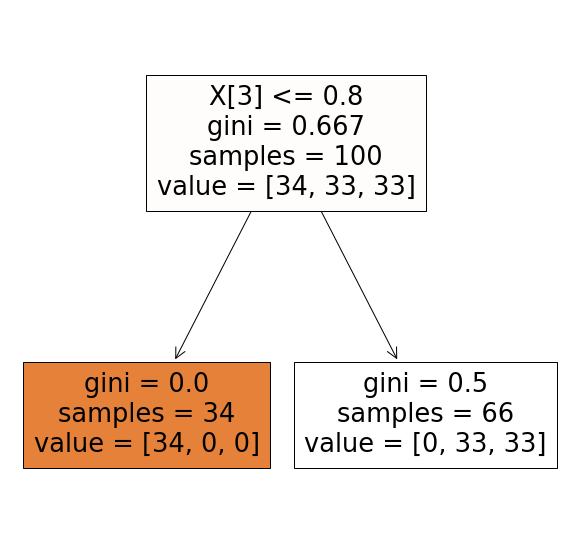

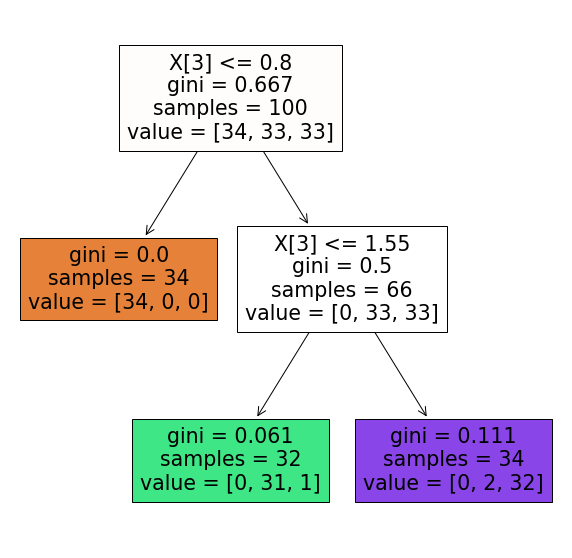

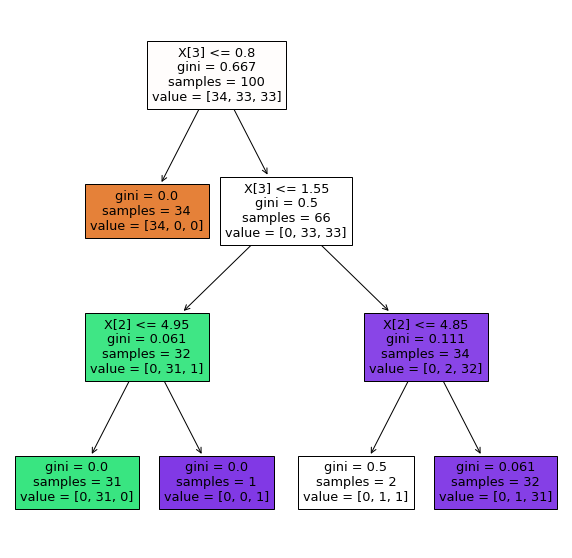

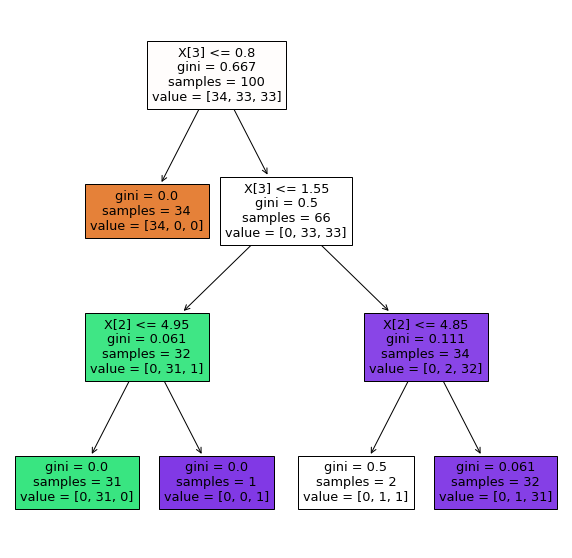

In [82]:
for i in trees:
    plt.figure(figsize=(10, 10))
    plot_tree(i, filled=True)
    plt.show()

In [83]:
for i in range(3):
    tree = DecisionTreeClassifier(max_depth=i+1, random_state=0)   # Especificamos la profundidad
    tree.fit(X_train, y_train)
    print("Entrenamiento:")
    print("Profundidad = " + str(i+1) + "  " + "Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
    
    print("Prueba:")
    print("Profundidad = " + str(i+1) + "  " 
          + "Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)) + "\n" + "\n")

Entrenamiento:
Profundidad = 1  Accuracy on training set: 0.670
Prueba:
Profundidad = 1  Accuracy on test set: 0.660


Entrenamiento:
Profundidad = 2  Accuracy on training set: 0.970
Prueba:
Profundidad = 2  Accuracy on test set: 0.900


Entrenamiento:
Profundidad = 3  Accuracy on training set: 0.980
Prueba:
Profundidad = 3  Accuracy on test set: 0.940




In [84]:
print("Entrenamiento:")
print("Sin especificiar profundidad: " + "Accuracy on training set: {:.3f}".format(treek.score(X_train, y_train)))

print("Prueba:")
print("Sin especificiar profundidad: " + "Accuracy on test set: {:.3f}".format(treek.score(X_test, y_test)))

Entrenamiento:
Sin especificiar profundidad: Accuracy on training set: 0.980
Prueba:
Sin especificiar profundidad: Accuracy on test set: 0.940


In [85]:
#Comente

### (iii) ¿Calcula la importancia relativa de los atributos?

### (iv) Para la misma base de datos construye árboles de decisión con profundidad = 3, pero ahora en vez de utilizar los cuatro atributos usa por separado todas las combinaciones posibles de parejas.

### (v) Imprime pruebas de exactitud con los conjuntos de entrenamiento y de prueba.

### (vi) Crees que tus resultados son consistentes con el resultado de importancia relativa de los atributos obtenido en el caso en que se usan los cuatro atributos para el análisis.